<a href="https://colab.research.google.com/github/dev-EthanJ/scikit-learn_Machine_Learning/blob/main/20221114_scikit-learn_ML_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn Machine Learning RandomForest <br> 사이킷런 머신러닝 랜덤포레스트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Collection

In [2]:
# 'https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho'

file_url = 'https://raw.githubusercontent.com/dev-EthanJ/scikit-learn_Machine_Learning/main/data/'
file_name = 'car.csv'
df = pd.read_csv(file_url + file_name)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 2. Data pre-processing

### 결측치 처리

In [4]:
missing_value = df.isnull().sum()

missing_value

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

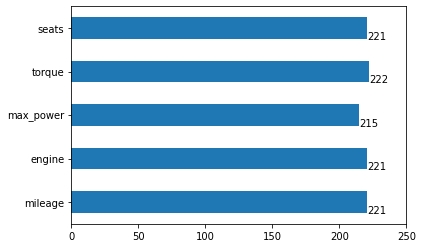

In [5]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
ax = missing_value[missing_value.gt(0)].plot(xlim=(0, 250), kind='barh')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))

plt.show()

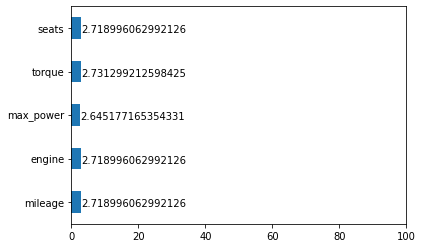

In [6]:
missing_value = df.isnull().mean() * 100

ax = missing_value[missing_value.gt(0)].plot(xlim=(0, 100), kind='barh')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.05, p.get_y() + 0.15))

plt.show()

- 약 2% 정도의 결측치: record 삭제로 처리

In [7]:
df.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
dtype: float64

In [8]:
df = df.dropna()
len(df)

7906

### 이상치(Outlier)

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

df.describe()

,year,selling_price,km_driven,seats
count,"7,906.00","7,906.00","7,906.00","7,906.00"
mean,"2,013.98","649,813.72","69,188.66",5.42
std,3.86,"813,582.75","56,792.30",0.96
min,"1,994.00","29,999.00",1.00,2.00
25%,"2,012.00","270,000.00","35,000.00",5.00
50%,"2,015.00","450,000.00","60,000.00",5.00
75%,"2,017.00","690,000.00","95,425.00",5.00
max,"2,020.00","10,000,000.00","2,360,457.00",14.00


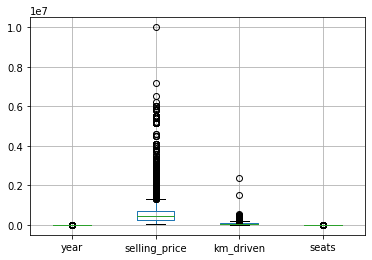

In [10]:
df.boxplot()

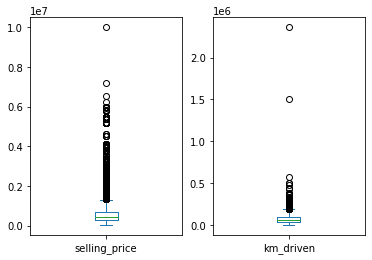

In [11]:
# subplots
fig, (axis1, axis2) = plt.subplots(1, 2)

axis1 = df.selling_price.plot.box(ax=axis1)
axis2 = df.km_driven.plot.box(ax=axis2)

plt.show()

- tree model은 `outlier` 처리 할 필요 없음

    - 결정트리: 이상치 처리 불필요

### 단위 있거나 텍스트인 Data

- Numerical Data화

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [14]:
df[['mileage', 'engine', 'max_power', 'torque']].head(10)

,mileage,engine,max_power,torque
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
5,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm
6,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)"
7,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm
8,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm
9,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm


In [15]:
df.describe(include=['O'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,7906,7906,7906,7906,7906,7906,7906,7906,7906
unique,1982,4,3,2,5,393,121,320,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4299,6563,6865,5215,225,1017,377,530


#### `engine` 단위 처리

- `df[column_label].str.method`: 행단위 문자열 처리 method 불러오기

In [16]:
df['engine'].str.split().head()

0    [1248, CC]
1    [1498, CC]
2    [1497, CC]
3    [1396, CC]
4    [1298, CC]
Name: engine, dtype: object

- `str.split(expand=True)`: DataFrame형태로 쪼개기

In [17]:
df['engine'].str.split(expand=True).head()

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC


In [18]:
df[['engine', 'engine_unit']] = df.engine.str.split(expand=True)

df[['engine', 'engine_unit']].head()

,engine,engine_unit
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC


In [19]:
df.engine.head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

- `dtype=object` → 실수형으로 변환

In [20]:
df['engine'] = df['engine'].astype('float32')

df['engine'].head()

0   1,248.00
1   1,498.00
2   1,497.00
3   1,396.00
4   1,298.00
Name: engine, dtype: float32

In [21]:
df['engine_unit'].unique()

array(['CC'], dtype=object)

In [22]:
df = df.drop(columns=['engine_unit'])

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,"1,248.00",74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,"1,498.00",103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,"1,497.00",78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,"1,396.00",90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,"1,298.00",88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


#### `max_power` 단위 처리

In [23]:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [24]:
df[['max_power', 'max_power_unit']] = df['max_power'].str.split(expand=True)

df['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [25]:
df['max_power'] = df['max_power'].astype('float')

df['max_power'].head()

0    74.00
1   103.52
2    78.00
3    90.00
4    88.20
Name: max_power, dtype: float64

In [26]:
df['max_power_unit'].unique()

array(['bhp'], dtype=object)

In [27]:
df = df.drop(columns=['max_power_unit'])

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,"1,248.00",74.00,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,"1,498.00",103.52,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,"1,497.00",78.00,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,"1,396.00",90.00,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,"1,298.00",88.20,"11.5@ 4,500(kgm@ rpm)",5.00


#### `mileage` 단위 처리

In [28]:
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [29]:
df[['mileage', 'mileage_unit']] = df['mileage'].str.split(expand=True)

df['mileage'].head()

0     23.4
1    21.14
2     17.7
3     23.0
4     16.1
Name: mileage, dtype: object

In [30]:
df['mileage'] = df['mileage'].astype('float')

df['mileage'].head()

0   23.40
1   21.14
2   17.70
3   23.00
4   16.10
Name: mileage, dtype: float64

In [31]:
df['mileage_unit'].unique()

array(['kmpl', 'km/kg'], dtype=object)

- `kmpl`: `km/l`: l당 km = 휘발유, 디젤

- `km/kg`: kg당 km = LPG, CNG

    - 연료 종류 문제


#### `fuel` 단위 처리

In [32]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

- 연료별 연비 비교 어려움 → 연료당 가격 환산 처리

    - Petrol : `$80.43 / L`

    - Diesel : `$73.56 / L`

    - LPG : `$40.85 / kg`

    - CNG : `$44.23 / kg`

In [33]:
fuels = {
    'Petrol': 80.43,
    'Diesel': 73.56,
    'LPG': 40.85,
    'CNG': 44.23
}

def manipulate_mileage(row):
    return row['mileage'] / fuels[row['fuel']]

- DataFrame의 각 행마다 적용되는 함수: 두 개 이상의 column의 dataset

    - `df.apply(func, axis=1)`

In [34]:
df['mileage'] = df.apply(manipulate_mileage, axis=1)

df['mileage'].head()

0   0.32
1   0.29
2   0.22
3   0.31
4   0.20
Name: mileage, dtype: float64

In [35]:
df = df.drop('mileage_unit', axis=1)

df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### `torque` 단위 처리

In [36]:
df['torque'].head(10)

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
5           113.75nm@ 4000rpm
6        7.8@ 4,500(kgm@ rpm)
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
9              160Nm@ 2000rpm
Name: torque, dtype: object

1. 단위 앞부분 숫자만 추출해서 Numerical Data로 변형

2. `Nm` 단위로 Scaling

In [37]:
df['torque'] = df['torque'].str.upper()

df['torque'].head(10)

0              190NM@ 2000RPM
1         250NM@ 1500-2500RPM
2       12.7@ 2,700(KGM@ RPM)
3    22.4 KGM AT 1750-2750RPM
4       11.5@ 4,500(KGM@ RPM)
5           113.75NM@ 4000RPM
6        7.8@ 4,500(KGM@ RPM)
7               59NM@ 2500RPM
8         170NM@ 1800-2400RPM
9              160NM@ 2000RPM
Name: torque, dtype: object

In [38]:
def change_torque_unit(tq):
    if 'NM' in str(tq):
        return 'Nm'
    if 'KGM' in str(tq):
        return 'kgm'

In [39]:
df['torque_unit'] = df['torque'].apply(change_torque_unit)

df['torque_unit'].unique()

array(['Nm', 'kgm', None], dtype=object)

In [40]:
df[df['torque_unit'].isna()]['torque'].unique()

array(['250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [41]:
df['torque_unit'] = df['torque_unit'].fillna('Nm')

df['torque_unit'].isna().sum()

0

- `torque` data의 숫자만 남기기 → regular expression 사용

In [42]:
df['torque'] = df['torque'].str.extract('([0-9\.]+)')

df['torque'].head(10)

0       190
1       250
2      12.7
3      22.4
4      11.5
5    113.75
6       7.8
7        59
8       170
9       160
Name: torque, dtype: object

In [43]:
df['torque'] = df['torque'].astype('float')

df['torque'].head()

0   190.00
1   250.00
2    12.70
3    22.40
4    11.50
Name: torque, dtype: float64

- `kgm` 단위 → `Nm` 단위 변환


In [44]:
def trans_torque(row):
    return row['torque'] * 9.8066 if row['torque_unit'] == 'kgm' else row['torque']

In [45]:
df['torque'] = df.apply(trans_torque, axis=1)

df['torque'].head()

0   190.00
1   250.00
2   124.54
3   219.67
4   112.78
Name: torque, dtype: float64

In [46]:
df = df.drop(columns=['torque_unit'])

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.32,"1,248.00",74.00,190.00,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.29,"1,498.00",103.52,250.00,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.22,"1,497.00",78.00,124.54,5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.31,"1,396.00",90.00,219.67,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.20,"1,298.00",88.20,112.78,5.00


### Categorical Data 처리

#### `name`

In [47]:
df['name'].nunique()

1982

In [48]:
df['name'].head(10)

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
5           Hyundai Xcent 1.2 VTVT E Plus
6            Maruti Wagon R LXI DUO BSIII
7                      Maruti 800 DX BSII
8                        Toyota Etios VXD
9    Ford Figo Diesel Celebration Edition
Name: name, dtype: object

- 맨 첫 단어(브랜드명)만 남기기

In [49]:
df['name'] = df['name'].str.split(expand=True)[0]

df['name'].nunique()

31

In [50]:
np.sort(df['name'].unique())

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

### `get_dummmies()`

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float32
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   float64
 12  seats          7906 non-null   float64
dtypes: float32(1), float64(4), int64(3), object(5)
memory usage: 833.8+ KB


In [52]:
[(label, df[label].nunique()) for label in df.columns if df[label].dtype == 'object']

[('name', 31),
 ('fuel', 4),
 ('seller_type', 3),
 ('transmission', 2),
 ('owner', 5)]

In [53]:
df = pd.get_dummies(df, columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'],
                    drop_first=True)

df.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.32,"1,248.00",74.00,190.00,5.00,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.29,"1,498.00",103.52,250.00,5.00,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.22,"1,497.00",78.00,124.54,5.00,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.31,"1,396.00",90.00,219.67,5.00,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.20,"1,298.00",88.20,112.78,5.00,0,0,...,0,0,1,1,0,1,0,0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   mileage                       7906 non-null   float64
 4   engine                        7906 non-null   float32
 5   max_power                     7906 non-null   float64
 6   torque                        7906 non-null   float64
 7   seats                         7906 non-null   float64
 8   name_Ashok                    7906 non-null   uint8  
 9   name_Audi                     7906 non-null   uint8  
 10  name_BMW                      7906 non-null   uint8  
 11  name_Chevrolet                7906 non-null   uint8  
 12  name_Daewoo                   7906 non-null   uint8  
 13  nam

## 3. Training Model

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=814
)

- Continuous Data: `RandomForestRegressor`

- Categorical Data: `RandomForestClassifier`

In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=123)

model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

## 4. Evaluating Model

- 분류문제: `accuracy`
- 수치예측: `RMSE`

In [57]:
from sklearn.metrics import mean_squared_error

print(
    "train_rmse: ", mean_squared_error(y_train, train_pred, squared=False),
    "\ntest_rmse: ", mean_squared_error(y_test, test_pred, squared=False)
)

train_rmse:  48436.98037690148 
test_rmse:  179288.6537737316


## K-Fold 교차검증

- 교차 검증(cross validation)

    - `train_test_split` train set & test set: 특정 `random_state` value값 가짐

    - 다양한 train set & test set을 통해서 Model의 신뢰성 높이는 방법

- 목적: model의 예측력을 더 안정적으로 평가(교차타당성)

    - 새로운 데이터를 얼마나 잘 예측하는지 확인하고자 훈련셋과 시험셋을 나누어서 평가했고,   
    이러한 데이터 분할은 랜덤 샘플링으로 이루어졌기 때문에 어느 정도 안정적인 보장
    
    - 하지만 랜덤 샘플링으로 나누어졌더라도, 그에 따라 발생하는 우연에 의한 오차들이    
    예측력을 평가하는 데 작은 노이즈로 존재
    
    - 이러한 작은 오차들까지 고려하여 평가하는 방법이 바로 교차검증 

- K-Fold 교차 검증(K-fold Cross-Validation)

    - Data를 K개로 쪼개어 그 중에 하나를 test set으로 선택하는 과정을 K번 반복

        - 반복한 결과에 대한 평균치 도출

| A | B | C | D | E |
|-|-|-|-|-|
|train|train|train|train|**test**|
|train|train|train|**test**|train|
|...|...|...|...|...|...|
|**test**|train|train|train|train

- `K=5`일 때 5가지 version의 Evaluating Model

  - `accunracne_score`, `RMSE` 등등 Model 평가 수치값 → 평균치 도출

In [58]:
from sklearn.model_selection import KFold

df = df.reset_index(drop=True)

df.index

RangeIndex(start=0, stop=7906, step=1)

In [59]:
kf = KFold(n_splits=5)

X = df.drop('selling_price', axis=1)
y = df['selling_price']

for train, test in kf.split(X):
    print("test : ", test)
    print("trian: ", train)
    print()

test :  [   0    1    2 ... 1579 1580 1581]
trian:  [1582 1583 1584 ... 7903 7904 7905]

test :  [1582 1583 1584 ... 3160 3161 3162]
trian:  [   0    1    2 ... 7903 7904 7905]

test :  [3163 3164 3165 ... 4741 4742 4743]
trian:  [   0    1    2 ... 7903 7904 7905]

test :  [4744 4745 4746 ... 6322 6323 6324]
trian:  [   0    1    2 ... 7903 7904 7905]

test :  [6325 6326 6327 ... 7903 7904 7905]
trian:  [   0    1    2 ... 6322 6323 6324]



In [60]:
total_train_rmse = list()
total_test_rmse = list()

# train set과 test set의 반복
for train_index, test_index in kf.split(X):
  
  # 독립변수 X = DataFrame: X.loc[index]
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  
  # 종속변수 y = Series: y[column_label] indexing
  y_train, y_test = y[train_index], y[test_index]

  model = RandomForestRegressor(random_state=np.random.randint(1000))

  # 학습
  model.fit(X_train, y_train)

  # 예측
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  # RMSE list에 추가
  total_train_rmse.append(mean_squared_error(y_train, train_pred, squared=False))
  total_test_rmse.append(mean_squared_error(y_test, test_pred, squared=False))

for idx in range(len(total_train_rmse)):
    print(total_train_rmse[idx], total_test_rmse[idx])

51242.051884221226 165206.70331799242
56073.3901592933 133310.48356030104
51870.40718729253 124608.70255010937
53648.060317139876 151825.15063185713
56876.22158334168 144253.88967046022


## Hyperparameter tuning

- `n_estimators=100`: RandomForest를 구성하는 결정트리 개수

- `max_depth`: 결정 트리와 유사, 각 tree의 최대 깊이(단계)

  - max_depth⇑ → Overfitting, max_depth⇓ → Underfitting(결여된 학습)

- `min_samples_split`: 해당 값보다 data수가 작으면 더 이상 나누지 않음

- `min_samples_leaf`: 최종적으로 node에 속하는 data의 최소개수

- `n_jobs`: 병렬 처리 시 사용할 CPU 코어 수

In [61]:
train_rmse_total = list()
test_rmse_total = list()

# train set과 test set의 반복
for train_index, test_index in kf.split(X):
  
  # 독립변수 X = DataFrame: X.loc[index]
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  
  # 종속변수 y = Series: y[column label] indexing
  y_train, y_test = y[train_index], y[test_index]

  model = RandomForestRegressor(
      n_estimators=300,
      max_depth=50,
      min_samples_split=5,
      min_samples_leaf=1,
      n_jobs=-1,
      random_state=np.random.randint(1000))

  # 학습
  model.fit(X_train, y_train)

  # 예측
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  # RMSE list에 추가
  train_rmse_total.append(mean_squared_error(y_train, train_pred, squared=False))
  test_rmse_total.append(mean_squared_error(y_test, test_pred, squared=False))

In [62]:
print(
    "train_rmse: %.8f" %(sum(train_rmse_total) / len(train_rmse_total)),
    "\n test_rmse: %.8f" %(sum(test_rmse_total) / len(test_rmse_total))
)

train_rmse: 67252.92642159 
 test_rmse: 143524.08060111


In [63]:
import joblib

joblib.dump(model, 'RandomForest_model.pkl')

['RandomForest_model.pkl']